<a href="https://colab.research.google.com/github/amurkhon/MachineLearning-projects/blob/main/Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fastai
import torch

In [ ]:
print(fastai.__version__)
print(torch.__version__)

2.7.6
1.12.0+cu113


In [ ]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)

#label getter funksiya
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

#dataloader
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'), label_func=label_getter, codes=np.loadtxt(path/'codes.txt', dtype=str))

#fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The cur

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.816479,2.639231,00:08


epoch,train_loss,valid_loss,time
0,1.936204,1.610095,00:01
1,1.639114,1.340049,00:01
2,1.470707,1.127841,00:01
3,1.326227,0.992829,00:01
4,1.197468,0.937363,00:01
5,1.094302,0.858543,00:01
6,0.997793,0.782906,00:01
7,0.909893,0.774936,00:01
8,0.836220,0.739478,00:01
9,0.774677,0.754323,00:01


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


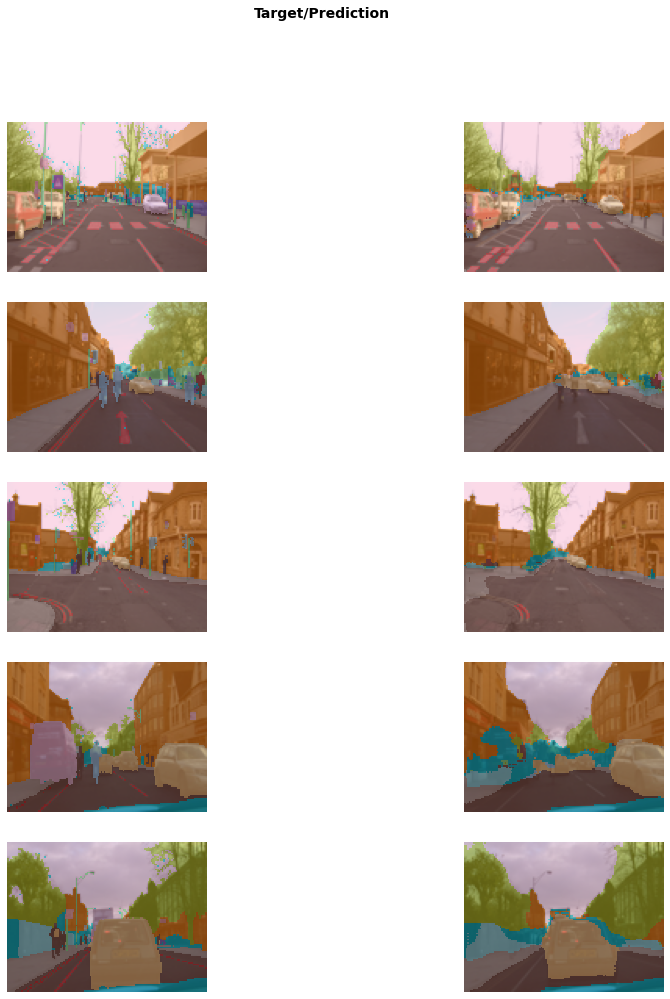

In [ ]:
learn.show_results(max_n=5, figsize=(15,16))